<b> PROJECT TITLE: Predicting Movie Rating and Building a Recommender System

<b> Problem Statement:
    
</b>
During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce to online advertisement recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries).


Recommender systems are critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. One of these sectors is movie industry. We will use movie dataset so the client of our project could be movie products sellers such as Amazon, Netflix, Hulu and movie production companies. 
The first goal of this project is understanding the important features of movie sector and predicting a movie rate. The second goal of this project is building a recommender system to provide recommendations for different users. 


<b>Dataset Description:
    
</b> For this project, I will use two datasets of movies from Kaggle. One of them contains various details about movies for our analysis. It consists of two different files as movies and credits. The data can be reached from the following link, https://www.kaggle.com/tmdb/tmdb-movie-metadata. 

The second dataset from Kaggle is about users. It can be reached from the following link. https://www.kaggle.com/rounakbanik/undefined#ratings_small.csv. 

<b> DATA WRANGLING

In [3]:
# import neccessary libraries
import numpy as np
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import train_test_split as train_test_split_surprise


In [4]:
# upload data files.
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

There two datasets, credits and movies. The credits dataset includes movie id , movie title, cast and crew columns.

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The movies dataset includes 20 columns such as budget, revenue, production companies, production countries, vote average, vote count,..etc.

In [7]:
# merge two datasets.
df = credits.merge(movies,right_on='id',left_on='movie_id',how='left')

In [8]:
df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
movie_id                4803 non-null int64
title_x                 4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null ob

We merged these two datasets on the common column, movie id. When merged these two datasets, we built a dataset includes 24 columns. Some columns have the same information so we will drop these same columns. Also, the data includes 4803 rows.

In [10]:
# change genres, cast, production companies and countries columns from json to string

df['production_companies'] = df.production_companies.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['genres'] = df.genres.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['production_countries'] = df.production_countries.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['keywords'] = df.keywords.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['cast'] = df.cast.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])

In [11]:
# change crew column to director column from json to string

df['crew'] = df['crew'].apply(literal_eval)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
df['crew'] = df['crew'].apply(director)
df.rename(columns = {'crew':'director'}, inplace = True)

Some columns using in our data analysis such as genres, cast, crew, production companies, and production countries are in json format so we changed these columns to string format and selected necessary variables from these json formats. 

In [12]:
# find differences of movie title and its original title.

df[df['original_title'] != df['title_x']][['title_x', 'original_title']].head(10)

,title_x,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution
488,Arthur and the Invisibles,Arthur et les Minimoys
492,Top Cat Begins,Don Gato: El inicio de la pandilla
561,Two Brothers,Deux frères
678,Dragon Blade,天將雄師
719,This Is It,Michael Jackson's This Is It


We compared title and original title columns to understand what the difference is between these two columns. We see that original title is the name of movies in original language and title is the English name of movies. We will use English title of movies for our analysis so we will delete original title column.

In [13]:
# delete unneccassary columns
drop_columns = ['movie_id', 'overview', 'status','tagline', 'homepage','spoken_languages', 'id','original_title', 'title_y']
df = df.drop(drop_columns, axis = 1)

We dropped unncessary columns such as dublicate columns, homepage, spoken_language, original title, status, etc.

In [14]:
# change title_x column name to title
df = df.rename(columns = {'title_x': 'title'})

While we merged two datasets, the dublicated name of columns changed to title_x. We again changed the title_x column name to title. 

In [15]:
# find duplicates rows
print('Number of rows:', df.title.shape[0])
df.title.unique()
print('Number of rows after dropping duplicates:', df.shape[0])

Number of rows: 4803
Number of rows after dropping duplicates: 4803


There is no duplicated rows.

In [16]:
# find zero values of revenue, budget and runtime columns.
print('Number of movies having zero revenue:',df[df['revenue'] == 0].shape[0])
print('Number of movies having zero budget:',df[df['budget'] == 0].shape[0])
print('Number of movies having zero runtime:',df[df['runtime'] == 0].shape[0])

Number of movies having zero revenue: 1427
Number of movies having zero budget: 1037
Number of movies having zero runtime: 35


Every movies has to be revenue, bugdet and runtime so we checked the zero values in these columns. These columns have zero values and this is not meaningful. However, we will keep these entries.

In [17]:
df.head()

,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,7.2,11800
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,6.9,4500
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,6.3,4466
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,7.6,9106
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",en,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,6.1,2124


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
title                   4803 non-null object
cast                    4803 non-null object
director                4773 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
keywords                4803 non-null object
original_language       4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 600.4+ KB


After cleaning the data, we have 15 columns and 4803 rows with nan values. Director, budget, release date, revenue and run time features haave nan values. Title, Cast, Director, Genres ,Keywords, Original Language, Production Companies and Production Countries and Release Date are categorical features. Budget, Popularity, Revenue, Runtime, Vote Averagea and Vote Count are numerical variables.

<b> EXPLORATORY DATA ANALYSIS

<b> Genre, Cast and Director

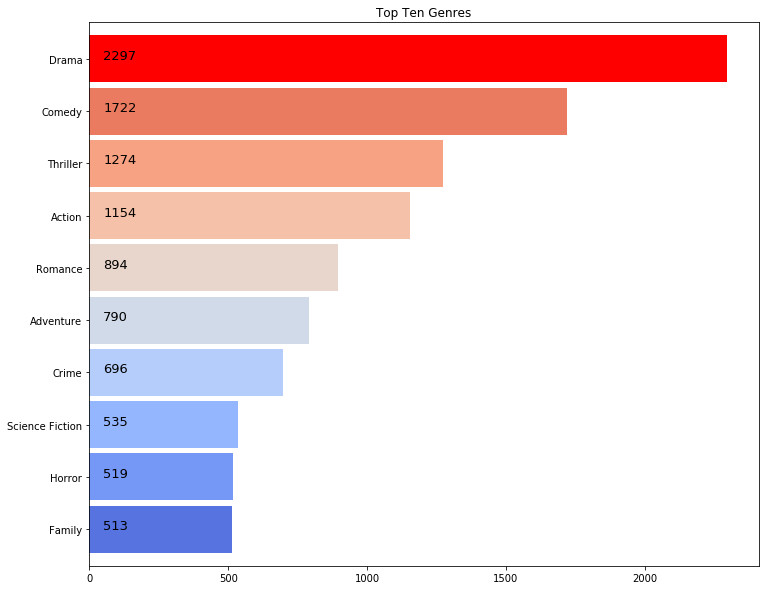

In [17]:
# create a bar chart of top ten genres
plt.figure(figsize=(12,10))
list1=[]
for i in df['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(50, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Genres')
plt.show()

We counted the number of movies for each genre. From above graph, we can say that Drama is the most producted genre in movie sector with 2297 movies. Comedy and thriller genres follow drama. 

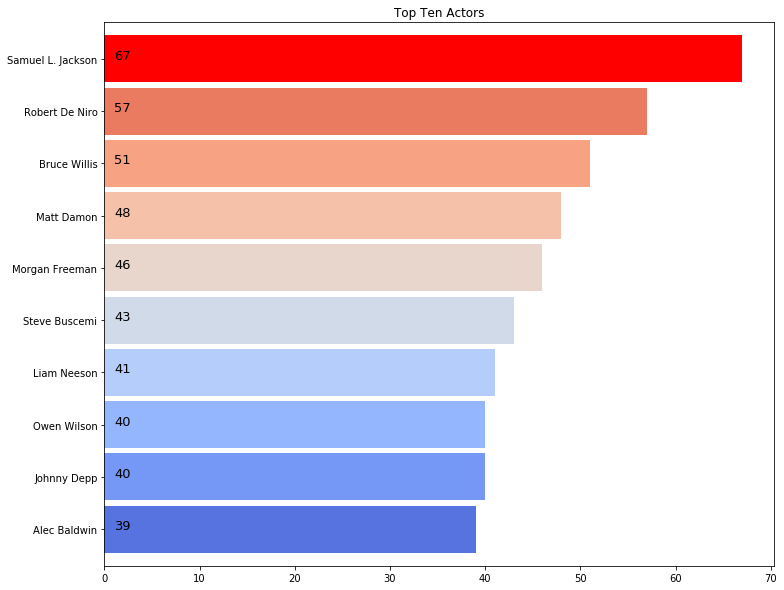

In [18]:
# create a bar chart of top ten actors
plt.figure(figsize=(12,10))
list_actor=[]
for i in df['cast']:
    list_actor.extend(i)
ax=pd.Series(list_actor).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list_actor).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(1, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Actors')
plt.show()

Samual L. Jackson is the first actor having roles in 67 movies. Then, Robert De Niro, Bruce Wills and Matt Damon follow him having  57, 51 and 48 roles respectively.

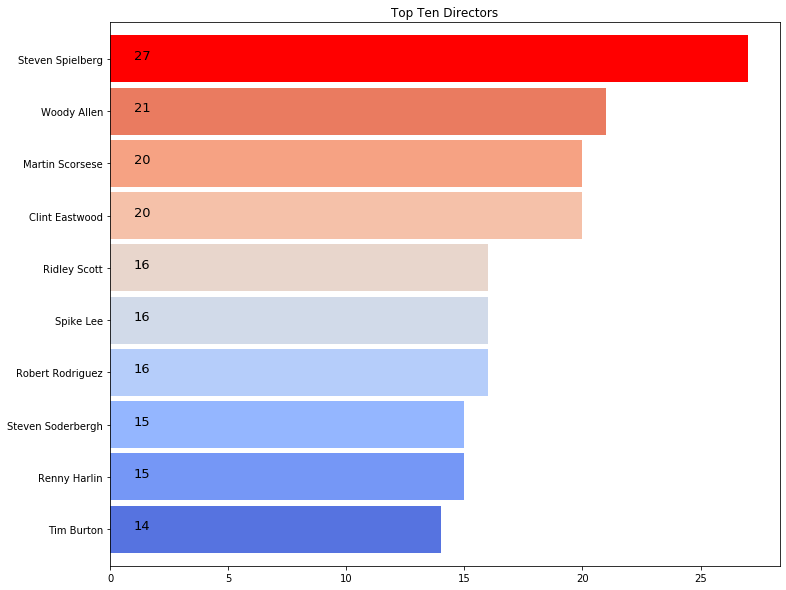

In [19]:
# create a bar chart of top ten directors
plt.figure(figsize=(12,10))
ax=df.director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(df.director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(1, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Directors')
plt.show()

From the above graph, we can say that Steven Spielberg is the most producted director with 27 movies.Then, Woody Allen follows him with 21 movies. Both Clien Esatwood and Martin Scorsese have 20 movies coming in the third place.

<b> Movie Title and Keywords

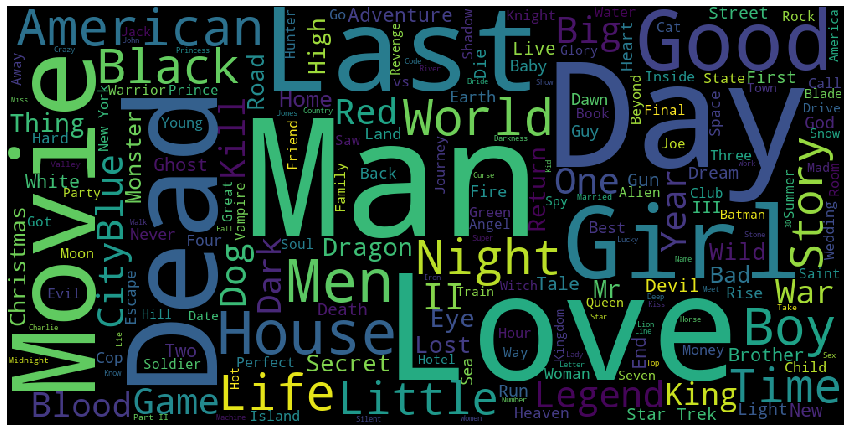

In [20]:
# build a wordcloud for movie titles.
df['title'] = df['title'].astype('str')
title_corpus = ' '.join(df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=500, width=1000).generate(title_corpus)
plt.figure(figsize=(15,10))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

When we analyze the movie titles by creating a world cloud., we see that 'Man, Love, Day, Dead, Last, Girl, etc' are the most commonly used words in movie titles. 

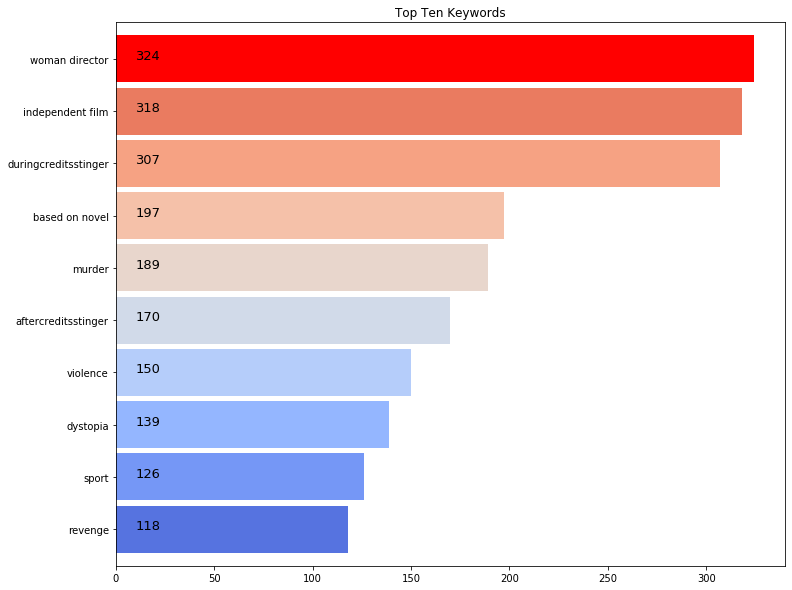

In [21]:
# create a bar chart of top ten keywords
plt.figure(figsize=(12,10))
list_keywords=[]
for i in df['keywords']:
    list_keywords.extend(i)
ax=pd.Series(list_keywords).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list_keywords).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(10, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Keywords')
plt.show()

From above graph, we see that woman director, independent film, during credits stinger, based on novel and murder are respectively top five keywords that are used to describe movies. 

<b> Production Countries, Companies and Original Language

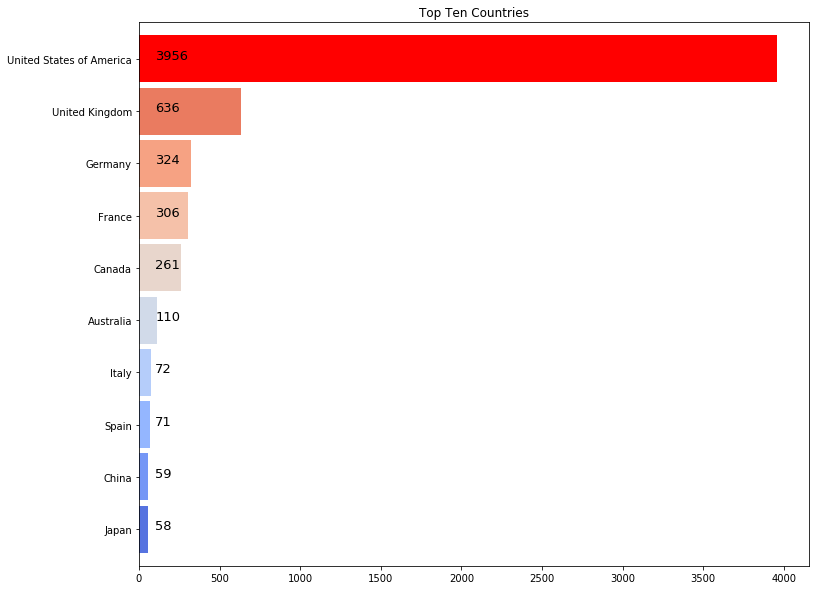

In [22]:
# create a bar chart of top ten countries.
plt.figure(figsize=(12,10))
list_country=[]
for i in df['production_countries']:
    list_country.extend(i)
ax=pd.Series(list_country).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list_country).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(100, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Countries')
plt.show()

In [23]:
# find rate of movies produced by countries.
countries = pd.DataFrame(pd.Series(list_country).value_counts(normalize = True)).round(2)
countries.columns= ['Percentage of Countries']
countries.head(10)

,Percentage of Countries
United States of America,0.61
United Kingdom,0.10
Germany,0.05
France,0.05
Canada,0.04
Australia,0.02
Italy,0.01
Spain,0.01
China,0.01
Japan,0.01


%61 of the movies is produced by the United States. It is the top producer country. United Kingdom is the second country producing %10 of the movies. France and Germany follow the United Kingdom having the %5 of the movies.

In [24]:
# find rate of original languages of movies
languages = pd.DataFrame(df.original_language.value_counts(normalize = True)).round(2)
languages.columns= ['Percentage of Languages']
languages.head(10)

,Percentage of Languages
en,0.94
fr,0.01
es,0.01
zh,0.01
de,0.01
hi,0.00
ja,0.00
it,0.00
cn,0.00
ru,0.00


Most of movies are produced by United States and England that speaks English. Thus, %94 of languages of movies are english.

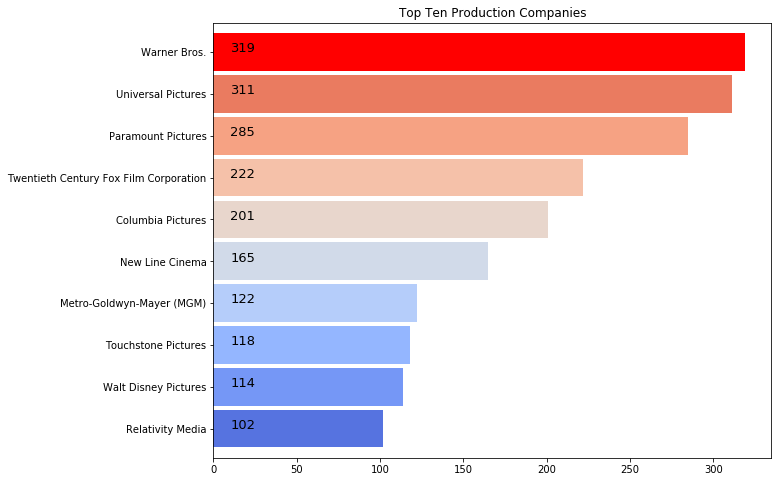

In [25]:
# create a bar chart of top ten companies. 
plt.figure(figsize=(10,8))
list_company=[]
for i in df['production_companies']:
    list_company.extend(i)
ax=pd.Series(list_company).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list_company).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(10, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Production Companies')
plt.show()

As we see from the above graph, Warner Bros., Universal Pictures and Paramount Pictures are the top three prodcution companies. The first most produced company,Warner Bros. , produced 319 movies. the second company, Universal Pictures produced 311 number of movies.

<b> Release Date

In [26]:
# create release year,month and day columns.
df['release_date'] = pd.to_datetime(df['release_date'])
years = df['release_date'].dt.year.round()
months = df['release_date'].dt.month_name(locale = 'English')
days = df['release_date'].dt.day_name(locale = 'English')

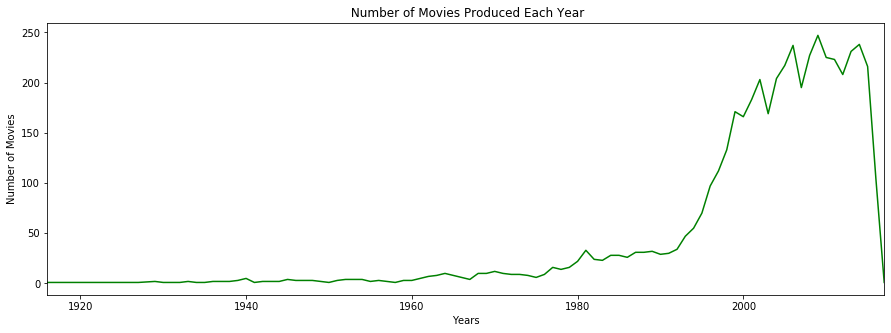

In [27]:
# plot time series of produced movies.
plt.figure(figsize=(15,5))
years.value_counts().sort_index().plot(color = 'green')
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.title(' Number of Movies Produced Each Year')
plt.show()

In [28]:
df.release_date.describe()

count                    4802
unique                   3280
top       2006-01-01 00:00:00
freq                       10
first     1916-09-04 00:00:00
last      2017-02-03 00:00:00
Name: release_date, dtype: object

First, we changed the release_date column from object to datetime to analyze the feature. We can state from the above time series that the number of movies shows a very sligtly increase after 90's. After 20's, at least about 150 movies were produced every year. As we see, the last movie in this dataset released in 2017-02-03. Also, the maximum number of movies produced in 2006. 

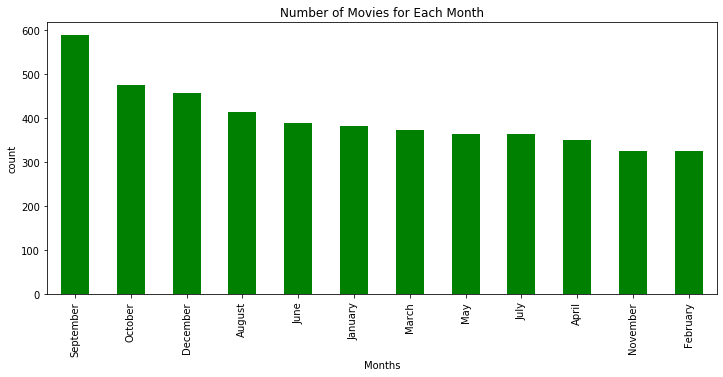

In [29]:
# plot number of movies for each month
plt.figure(figsize=(12,5))
months.value_counts().plot.bar(color='green')
plt.title('Number of Movies for Each Month')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

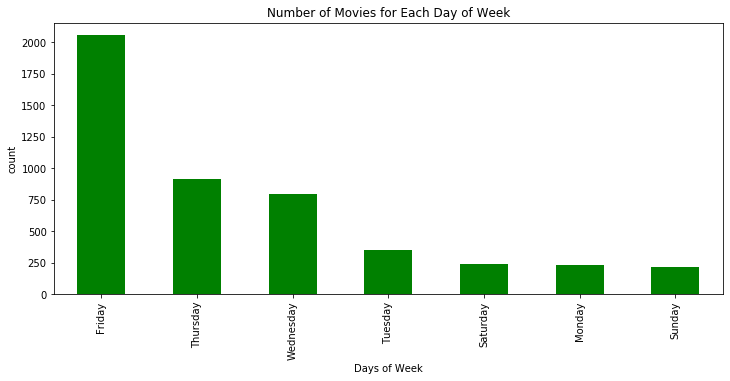

In [30]:
# plot number of movies for each day of week.
plt.figure(figsize=(12,5))
days.value_counts().plot.bar( color='green')
plt.title('Number of Movies for Each Day of Week')
plt.xlabel('Days of Week')
plt.ylabel('count')
plt.show()

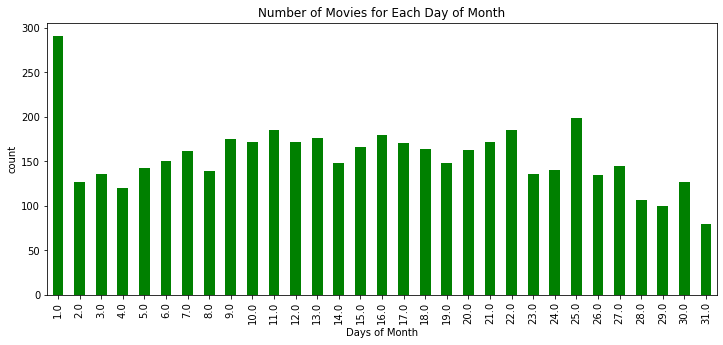

In [31]:
# plot number of movies for each day of month.
plt.figure(figsize=(12,5))
df['release_date'].dt.day.value_counts().sort_index().plot.bar(color='green')
plt.title('Number of Movies for Each Day of Month')
plt.xlabel('Days of Month')
plt.ylabel('count')
plt.show()

We seperated months, days of weeks and the days of month of release date column to see the detailed number of movies produced. September is the top month to release a movie. Then, October and December follow September. Most of the people do not prefer to go to a movie in the summer so we can say that the movies release after the summer holiday. Another important point is about the day of the week.As we see from the days of week graph, Friday has the most number of movies comparing to other days because people prefer to go to a movie at weekends. The last important point is that the number of movies is greater than the other days in the first day of the month. Probably, the movies release in the beginning of the months.

<b> Run Time of Movies

C:\Users\skisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'count')

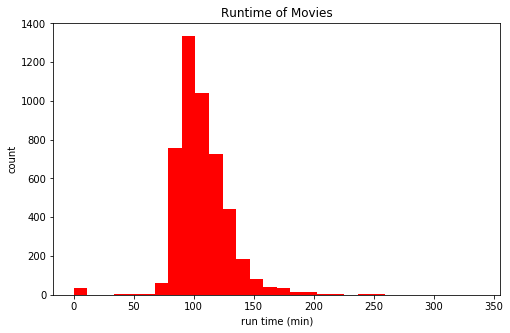

In [32]:
# plot the histogram of movies runtime.
plt.figure(figsize = (8,5))
plt.hist(df['runtime'], bins = 30, color = 'r')
plt.title('Runtime of Movies')
plt.xlabel('run time (min)')
plt.ylabel('count')

In [33]:
df.runtime.describe()

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [34]:
# find shortest movies.
df[['title','runtime','release_date']].sort_values('runtime') .head(10)

,title,runtime,release_date
4118,Hum To Mohabbat Karega,0.0,2000-05-26
4210,Dil Jo Bhi Kahey...,0.0,2006-12-07
4205,N-Secure,0.0,2010-10-15
4571,Rise of the Entrepreneur: The Search for a Bet...,0.0,2014-11-20
4569,Mutual Friends,0.0,2014-04-15
4566,Diamond Ruff,0.0,2015-01-01
4564,Straight Out of Brooklyn,0.0,1991-06-13
3992,Sardaarji,0.0,2015-06-26
4611,The Big Swap,0.0,1998-06-11
4558,Alleluia! The Devil's Carnival,0.0,2016-03-29


In [35]:
# find longest movies.
df[['title','runtime','release_date']].sort_values('runtime', ascending=False,) .head(10)

,title,runtime,release_date
2384,Carlos,338.0,2010-05-19
2631,The Company,276.0,2007-08-05
1922,Gettysburg,254.0,1993-10-08
1125,Cleopatra,248.0,1963-06-12
2373,Hamlet,242.0,1996-12-25
3510,Emma,240.0,2009-10-11
3813,Gone with the Wind,238.0,1939-12-15
1663,Once Upon a Time in America,229.0,1984-02-16
4497,Woodstock,225.0,1970-03-26
1109,Heaven's Gate,219.0,1980-11-19


The shortest movie is Vessel with 14 minutes released in 2012. The longest movies is Carlos with 338 minutes released in 2010. The average run time of movies is 107.6 minutes. Most of movies run between 75 and 150 minutes. 

<b> Popularity

Text(0, 0.5, 'count')

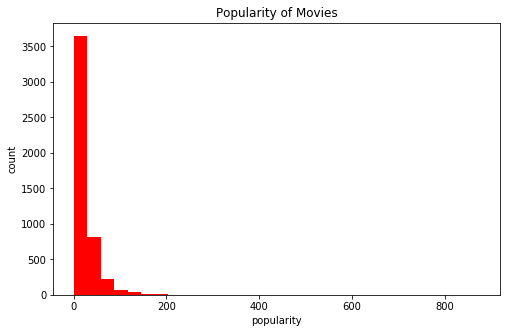

In [36]:
# plot the histogram of movies popularity.
plt.figure(figsize = (8,5))
plt.hist(df['popularity'], bins = 30, color = 'r')
plt.title('Popularity of Movies')
plt.xlabel('popularity')
plt.ylabel('count')

In [37]:
df.popularity.describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [38]:
# find most popular movies.
df[['title','popularity','release_date']].sort_values('popularity', ascending=False).head(10)

,title,popularity,release_date
546,Minions,875.581305,2015-06-17
95,Interstellar,724.247784,2014-11-05
788,Deadpool,514.569956,2016-02-09
94,Guardians of the Galaxy,481.098624,2014-07-30
127,Mad Max: Fury Road,434.278564,2015-05-13
28,Jurassic World,418.708552,2015-06-09
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
82,Dawn of the Planet of the Apes,243.791743,2014-06-26
200,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
88,Big Hero 6,203.734590,2014-10-24


In [39]:
# find the most unpopular movies. 
df[['title','popularity','release_date']].sort_values('popularity').head(10)

,title,popularity,release_date
4553,America Is Still the Place,0.000000,NaT
3361,Alien Zone,0.000372,1978-11-22
4727,Penitentiary,0.001117,1979-12-01
4118,Hum To Mohabbat Karega,0.001186,2000-05-26
4625,Midnight Cabaret,0.001389,1990-01-01
4509,Love Letters,0.001586,1983-04-01
4305,Down & Out With The Dolls,0.002386,2003-03-20
4721,The Work and The Story,0.002388,2003-01-01
4487,Hav Plenty,0.003142,1997-09-11
4589,Fabled,0.003352,2002-01-01


The first popular movie is Minions with 875.58 points. Interstallar and Deadpool follow Minions with 724.24 and 514.56 points, respectively. When we analyze the distribution of the popularity, 21.49 is the average of it. %75 of the movies has popularity less than 28.31. 

<b> Vote Average and Vote Count

Text(0, 0.5, 'count')

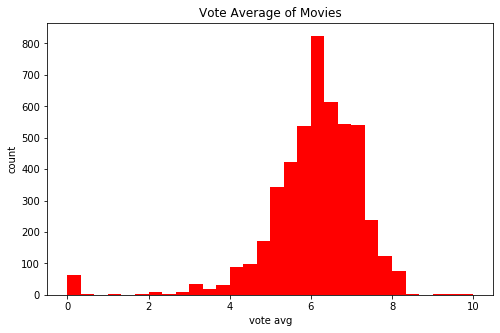

In [40]:
# plot the histogram of movies vote_avg.
plt.figure(figsize = (8,5))
plt.hist(df['vote_average'], bins = 30, color = 'r')
plt.title('Vote Average of Movies')
plt.xlabel('vote avg')
plt.ylabel('count')

In [41]:
df.vote_average.describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

The mean of the vote average of movies is 6.09. It looks like a normal distribution. The vote average changes between 0 to 10.There are four movies having 10 vote average. These movies are Stiff Upper Lips, Me You and Five Bucks, Dancer, Texas Pop.81 and Little Big Top. However, these movies have only one or two votes so these higher vote averages do not make any sense.

In [42]:
# find the most rated movies.
df[['title','vote_average','vote_count','release_date']].sort_values('vote_average', ascending=False,).head(10)

,title,vote_average,vote_count,release_date
3519,Stiff Upper Lips,10.0,1,1998-06-12
4247,Me You and Five Bucks,10.0,2,2015-07-07
4045,"Dancer, Texas Pop. 81",10.0,1,1998-05-01
4662,Little Big Top,10.0,1,2006-01-01
3992,Sardaarji,9.5,2,2015-06-26
2386,One Man's Hero,9.3,2,1999-08-02
2970,There Goes My Baby,8.5,2,1994-09-02
1881,The Shawshank Redemption,8.5,8205,1994-09-23
2796,The Prisoner of Zenda,8.4,11,1937-09-03
3337,The Godfather,8.4,5893,1972-03-14


Text(0, 0.5, 'count')

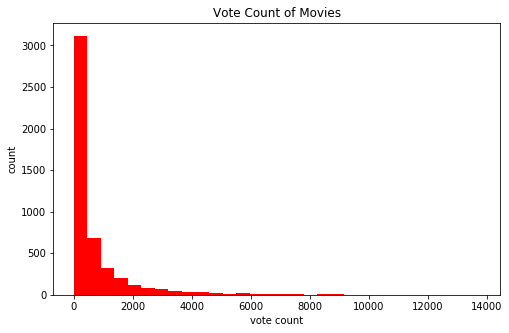

In [43]:
# plot the histogram of movies vote_count
plt.figure(figsize = (8,5))
plt.hist(df['vote_count'], bins = 30, color = 'r')
plt.title('Vote Count of Movies')
plt.xlabel('vote count')
plt.ylabel('count')

In [44]:
df.vote_count.describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [45]:
print('The number of movies having no vote:' , df.vote_count.loc[df['vote_count'] == 0].count())

The number of movies having no vote: 62


In [46]:
# find most voted movies.
df[['title','vote_average','vote_count','release_date']].sort_values('vote_count', ascending=False,).head(10)

,title,vote_average,vote_count,release_date
96,Inception,8.1,13752,2010-07-14
65,The Dark Knight,8.2,12002,2008-07-16
0,Avatar,7.2,11800,2009-12-10
16,The Avengers,7.4,11776,2012-04-25
788,Deadpool,7.4,10995,2016-02-09
95,Interstellar,8.1,10867,2014-11-05
287,Django Unchained,7.8,10099,2012-12-25
94,Guardians of the Galaxy,7.9,9742,2014-07-30
426,The Hunger Games,6.9,9455,2012-03-12
127,Mad Max: Fury Road,7.2,9427,2015-05-13


The vote count feature has an exponential distribution. 62 of movies have no vote and %50 of the vote count is less than 235. Inception is the first movie having 13752 vote count. The second movie having 12002 votes is The Dark Knight. Then, Avatar follows them with 11800 votes. 

In [47]:
# find most rated movies having more than 2000 votes.
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'release_date']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,release_date
1881,The Shawshank Redemption,8.5,8205,1994-09-23
3337,The Godfather,8.4,5893,1972-03-14
3232,Pulp Fiction,8.3,8428,1994-10-08
662,Fight Club,8.3,9413,1999-10-15
2294,Spirited Away,8.3,3840,2001-07-20
2731,The Godfather: Part II,8.3,3338,1974-12-20
1818,Schindler's List,8.3,4329,1993-11-29
3865,Whiplash,8.3,4254,2014-10-10
2170,Psycho,8.2,2320,1960-06-16
1990,The Empire Strikes Back,8.2,5879,1980-05-17


If we filter the movies having more than 2000 votes, The Shawshank Redemption rating is maximum with 8.5 vote average. The Godfather comes in the second place with 8.4 rating. 

<b> Budget and Revenue

Text(0, 0.5, 'count')

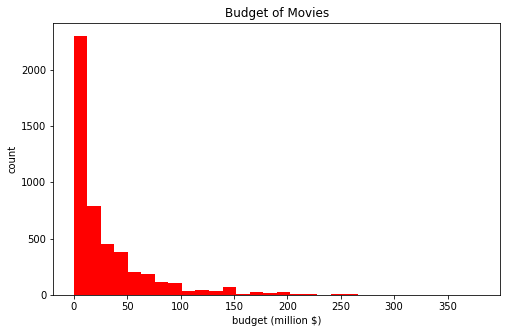

In [48]:
# plot the histogram of movies budget
plt.figure(figsize = (8,5))
plt.hist(df['budget']/1000000, bins = 30, color = 'r')
plt.title('Budget of Movies')
plt.xlabel('budget (million $)')
plt.ylabel('count')

In [49]:
df.budget.describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [50]:
df[['title','budget','release_date']].sort_values('budget', ascending=False,).head(10)

,title,budget,release_date
17,Pirates of the Caribbean: On Stranger Tides,380000000,2011-05-14
1,Pirates of the Caribbean: At World's End,300000000,2007-05-19
7,Avengers: Age of Ultron,280000000,2015-04-22
10,Superman Returns,270000000,2006-06-28
4,John Carter,260000000,2012-03-07
6,Tangled,260000000,2010-11-24
5,Spider-Man 3,258000000,2007-05-01
13,The Lone Ranger,255000000,2013-07-03
46,X-Men: Days of Future Past,250000000,2014-05-15
22,The Hobbit: The Desolation of Smaug,250000000,2013-12-11


In [51]:
df[['title','budget','release_date']].sort_values('budget').head(10)

,title,budget,release_date
2401,City of Ghosts,0,2002-01-01
3187,Hamlet 2,0,2008-01-21
3183,The Ultimate Gift,0,2006-10-20
3179,Chasing Papi,0,2003-04-16
3178,The Savages,0,2007-01-19
3176,Breakin' All the Rules,0,2004-05-14
3157,Jab Tak Hai Jaan,0,2012-11-13
3156,Red Dog,0,2011-08-04
3154,Kites,0,2010-05-21
3152,Richard III,0,1995-12-29


Text(0, 0.5, 'count')

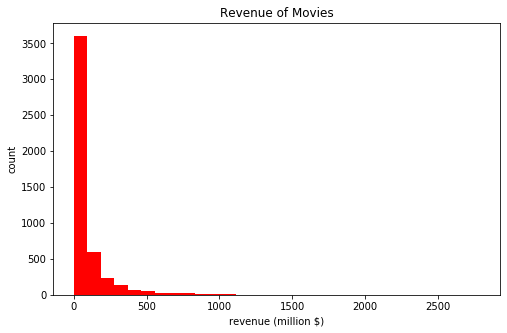

In [52]:
# plot the histogram of movies revenue
plt.figure(figsize = (8,5))
plt.hist(df['revenue']/1000000, bins = 30, color = 'r')
plt.title('Revenue of Movies')
plt.xlabel('revenue (million $)')
plt.ylabel('count')

In [53]:
df.revenue.describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [54]:
df[['title','revenue','release_date']].sort_values('revenue', ascending=False,).head(10)

,title,revenue,release_date
0,Avatar,2787965087,2009-12-10
25,Titanic,1845034188,1997-11-18
16,The Avengers,1519557910,2012-04-25
28,Jurassic World,1513528810,2015-06-09
44,Furious 7,1506249360,2015-04-01
7,Avengers: Age of Ultron,1405403694,2015-04-22
124,Frozen,1274219009,2013-11-27
31,Iron Man 3,1215439994,2013-04-18
546,Minions,1156730962,2015-06-17
26,Captain America: Civil War,1153304495,2016-04-27


In [55]:
df[['title','revenue','release_date']].sort_values('revenue').head(10)

,title,revenue,release_date
2401,City of Ghosts,0,2002-01-01
3122,Blonde Ambition,0,2007-12-21
3123,The Oxford Murders,0,2008-01-18
3124,The Reef,0,2010-05-15
3125,Eulogy,0,2004-10-15
3126,White Noise 2: The Light,0,2007-01-05
3127,Beat the World,0,2011-06-10
3128,Fifty Dead Men Walking,0,2008-09-10
3118,Motherhood,0,2009-01-21
3129,Jungle Shuffle,0,2014-08-07


Both budget and revenue of movies have an exponential distribution. They have zero values that are not meaningful, but we will not drop these values to apply machine learning algorithms. The %50 of movies’ budget are less than 15 million $. Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End and Avengers: Age of Ultron have 380 million $, 300 million $ and 280 million $ budget, respectively. These movies are top three movies having more budget comparing other movies. %50 of movies’ revenue is less than 19 million $. Avatar, Titanic, The Avengers are top three movies having more than 1.5 billion $ revenue. 

<b> Correlation of Numerical Features

Text(0.5, 1, 'CORRELATION MATRIX')

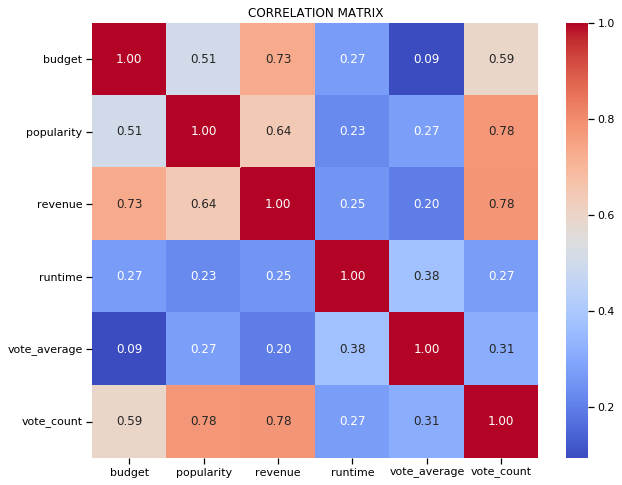

In [56]:
# visualize the correlation between numeric variables.
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "coolwarm" )
plt.title('CORRELATION MATRIX')

We built a correlation matrix to understand the relationship between numerical features. All numerical features have positive relationship between each other. There is a strong correlation between popularity and vote count. Also, the same relationship is valid between revenue and budget. We can say that if the budget is higher for a movie, we can expect higher revenue too. In addition, if a movie received many votes, its popularity increases in terms of the number of votes.

<b> PREDICTING VOTE AVERAGE

In [57]:
# Building train and test data and standardization
X = df[['popularity', 'vote_count', 'revenue', 'budget']]
y = df['vote_average'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42 )

scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [60]:
# Linear Regression Model
linear_model = LinearRegression() 
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print('Linear Model RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

Linear Model RMSE: 1.142936955228411


In [61]:
# KNN Regression Model
rmse_values = [] 
for k in range(5,11):

    KNN_model = KNeighborsRegressor(n_neighbors = k)
    KNN_model.fit(X_train, y_train)
    y_pred = KNN_model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_values.append(error)
    print('KNN Model RMSE for k =' , k , ':', error)    

KNN Model RMSE for k = 5 : 0.9170384581476931
KNN Model RMSE for k = 6 : 0.9071766730598588
KNN Model RMSE for k = 7 : 0.9077793127184054
KNN Model RMSE for k = 8 : 0.8989416654146611
KNN Model RMSE for k = 9 : 0.8864749464110114
KNN Model RMSE for k = 10 : 0.8819050607745806


In [62]:
# Random Forest Model
for i in range(50,200,20):
    RF_model = RandomForestRegressor(n_estimators = i)
    RF_model.fit(X_train, y_train)  
    y_pred = RF_model.predict(X_test) 
    error = np.sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_values.append(error)
    print('RF RMSE for n_estimator =', i , ':', error)

RF RMSE for n_estimator = 50 : 0.8691340834153295
RF RMSE for n_estimator = 70 : 0.867550015139498
RF RMSE for n_estimator = 90 : 0.8644038008844245
RF RMSE for n_estimator = 110 : 0.8726479830822365
RF RMSE for n_estimator = 130 : 0.8703479095143601
RF RMSE for n_estimator = 150 : 0.8677051501449795
RF RMSE for n_estimator = 170 : 0.8650161643075953
RF RMSE for n_estimator = 190 : 0.8650259057546114


In this part, we built three machine learning algorithms to predict the average rating of a movie. These algorithms are linear regression, KNN (K nearest neighbors) and random forest regression. Also, we only used popularity, vote count, revenue, and budget features to predict vote average. 

Before built our models, we split our dataset into two part as a training and test set. Also, we standardized the feature values to get meaningful result. We applied these algorithms in Scikit-Learn and found Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. A smaller RMSE means that the performance of the model is better, so we compared the RMSE of the models we built. These are the RMSE result of each model we built. 

As a result, we got minimum RMSE of 0.864 with the performance of Random Forest with 90 number of estimators. 


<b> RECOMMENDER SYSTEM

Recommender systems are one of the most common used and easily understandable applications of data science. Lots of work has been done on this topic, the interest and demand in this area remains very high because of the rapid growth of the internet and the information overload problem. It has become necessary for online businesses to help users to deal with information overload and provide personalized recommendations, content and services to them.
Two of the most popular ways to approach recommender systems are collaborative filtering and content-based recommendations.

<b>Content Based Filtering

In [19]:
df[['title', 'cast', 'director', 'keywords', 'genres', 'production_companies']].head()

,title,cast,director,keywords,genres,production_companies
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo..."
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai..."
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]",[Walt Disney Pictures]


I will use cast, director, keywords, genres and production companies as content to create recommendation engine in terms of movie title. 

In [20]:
# Create a function to convert strings to lower case and clean the values.
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [21]:
# apply clean_data function
features = ['cast', 'director', 'keywords', 'genres', 'production_companies']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [22]:
# Create a funtion to create a string including all values.
def all_words(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])+ ' ' + ' '.join(x['production_companies'])
df['all_words'] = df.apply(all_words, axis=1)

In [23]:
# create count matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['all_words'])

In [24]:
# Compute the Cosine Similarity matrix

cosine_sim= cosine_similarity(count_matrix, count_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title'])

In [25]:
def get_recommendation(title, cosine_sim=cosine_similarity):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [26]:
get_recommendation('Interstellar', cosine_sim)

4332                Silent Running
96                       Inception
239                        Gravity
635                      Apollo 13
643                  Space Cowboys
270                    The Martian
3405    Stargate: The Ark of Truth
3624                          Moon
539                     Titan A.E.
720                      Contagion
Name: title, dtype: object

In [27]:
get_recommendation('Frozen', cosine_sim)

89                 Wreck-It Ralph
88                     Big Hero 6
391                     Enchanted
6                         Tangled
1695                      Aladdin
1426                      Valiant
289      The Emperor's New Groove
2114         Return to Never Land
269     The Princess and the Frog
1620              Winnie the Pooh
Name: title, dtype: object


<b>Collaborative Filtering

In this filtering, I will focus on the collaborative filtering approach, that is: the user is recommended items that people with similar tastes and preferences liked in the past. In another word, this method predicts unknown ratings by using the similarities between users.

In [28]:
users = pd.read_csv('ratings_small.csv')
users.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [30]:
reader = Reader()
data = Dataset.load_from_df(users[['userId', 'movieId', 'rating']], reader)

In [31]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv = 5, verbose=True )

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8922  0.8990  0.9010  0.8903  0.9039  0.8973  0.0052  
MAE (testset)     0.6881  0.6943  0.6934  0.6860  0.6941  0.6912  0.0034  
Fit time          9.56    10.09   10.17   10.39   10.09   10.06   0.27    
Test time         0.28    0.34    0.27    0.35    0.27    0.30    0.04    


{'test_rmse': array([0.8921833 , 0.89902656, 0.90099713, 0.89029839, 0.90388223]),
 'test_mae': array([0.68813997, 0.69425142, 0.69337013, 0.68604482, 0.69406408]),
 'fit_time': (9.562355518341064,
  10.089240074157715,
  10.167652606964111,
  10.388878583908081,
  10.093908786773682),
 'test_time': (0.281174898147583,
  0.34458041191101074,
  0.2709386348724365,
  0.34595394134521484,
  0.2684810161590576)}

In [32]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split_surprise(data, test_size=.25)

# Train the algorithm on the trainset, and predict ratings for the testset
svd.fit(trainset)
predictions = svd.test(testset)

# compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8957


0.8957348410883386

In [33]:
users[users['userId'] == 100]

,userId,movieId,rating,timestamp
15273,100,1,4.0,854193977
15274,100,3,4.0,854194024
15275,100,6,3.0,854194023
15276,100,7,3.0,854194024
15277,100,25,4.0,854193977
15278,100,32,5.0,854193977
15279,100,52,3.0,854194056
15280,100,62,3.0,854193977
15281,100,86,3.0,854194208
15282,100,88,2.0,854194208


In [40]:
svd.predict(100,1)

Prediction(uid=100, iid=1, r_ui=None, est=3.553598167371615, details={'was_impossible': False})

In [39]:
svd.predict(100,2)

Prediction(uid=100, iid=2, r_ui=None, est=3.2558176728417916, details={'was_impossible': False})